# Gradient Descent Implementation

Abby Irish
CS74 Winter 2025

You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

**1) [5 points]** Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^6+ 3w^4 - 15w^3 + w^2 + 10w - 50 \right)$

$\frac{\partial}{\partial w}g(w) = \frac{1}{50}\left(6w^5 + 12w^3 - 45w^2 + 10 \right)$

**2) [25 points]** Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [3]:
# gradient descent function
# inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)

def gradient(w): # define gradient function (derivative of the cost function)
    return (1 / 50) * (6 * w**5 + 12 * w**3 - 45 * w**2 + 10)

def cost_function(w): # define cost function
    return (1/50) * (w**6 + 3*w**4 - 15*w**3 + w**2 + 10*w - 50)

def gradient_descent(alpha, max_its, w0): 
    w = w0 # initialize w0
    cost_history = [] # list to store cost histories

    for i in range(max_its):
        grad_w = gradient(w) # compute gradient
        w = w - alpha * grad_w # update value of w
        
        cost_history.append(cost_function(w)) # update cost function with each iteration

    return cost_history # return cost history for each step

**3) [10 points]** Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).


$w^0$ = 2.0
max_its = 2000

# first run
alpha = 0.01
# second run
alpha = 0.001
# third run
alpha = 0.0001


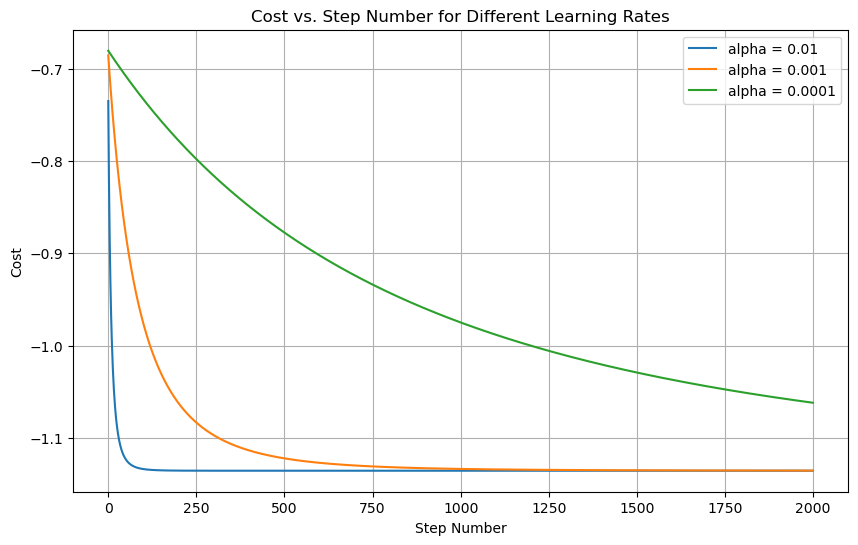

In [4]:
import matplotlib.pyplot as plt
# %matplotlib inline # To keep your plots embedded

# Define alphas and parameters
alphas = [0.01, 0.001, 0.0001]
max_its = 2000
w0 = 2.0

# Store the cost histories for each alpha
cost_histories = {}

# Run gradient descent for each alpha
for alpha in alphas:
    cost_histories[alpha] = gradient_descent(alpha, max_its, w0)

# Plotting
plt.figure(figsize=(10, 6))
for alpha in alphas:
    plt.plot(range(max_its), cost_histories[alpha], label=f"alpha = {alpha}")

# add labels
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost vs. Step Number for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()

**For the next few problems we will be comparing fixed and diminishing learning rates**

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

**4) [5 points]** Is this function convex? If no, why not? If yes, where is its global minimum?

Yes, this function takes the absolute value of w and is convex: 
$g(w) = \left| w \right| = 
\begin{cases} 
1 & \text{if } w > 0 \\
0 & \text{if } w = 0 \\
-1 & \text{if } w < 0
\end{cases}$

Knowing that it is a convex function, we can guarantee that any local minimum is actually a global minimum. Its global minimum is at w = 0.

**5) [5 points]** What is the derivative of the cost function?

$\frac{d}{dw} \left| w \right| = 
\begin{cases} 
1 & \text{if } w > 0 \\
-1 & \text{if } w < 0 \\
\text{undefined} & \text{if } w = 0
\end{cases}$


The derivative represents the slope of the cost function at any given point, and is used to adjust the parameter w during gradient descent to reduce the cost. The function is non-differentiable at zero (an edge-case).

**6) [20 points]** Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function.

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [5]:
from autograd import grad
import autograd.numpy as np

In [6]:
# gradient descent function with autograd

# inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha,max_its, w0):
    gradient = grad(g)   # use the autograd library to find the gradient of a function

    # initialize weight and list to store weights and cost history
    w = w0
    weight_history = [w]
    cost_history = [g(w)]

    for step in range(max_its):
        grad_w = gradient(w) # compute gradient
        w = w - alpha * grad_w # update weight
        cost = g(w) # compute cost
         
        # Store history at each step
        weight_history.append(w)
        cost_history.append(cost)


    return weight_history, cost_history

**7) [10 points]** Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

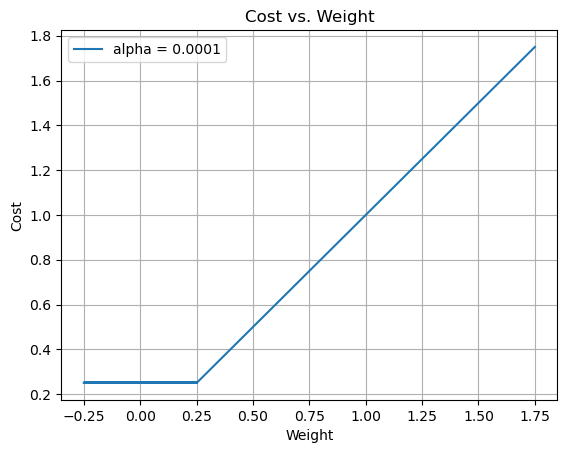

In [7]:
# define function: g(w) = |w|
def g(w):
    return np.abs(w)

# run gradient descent function
weight_history, cost_history = gradient_descent(g, 0.5, 20, 1.75)

# plotting
plt.plot(weight_history, cost_history, label=f"alpha = {alpha}")
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.title("Cost vs. Weight")
plt.legend()
plt.grid()
plt.show()

**8) [15 points]** Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and wieght history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

In [19]:
# gradient descent function
# inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w0):
    gradient = grad(g)   # use the autograd library to find the gradient of a function
    
    w = w0
    weight_history = [w]
    cost_history  = [g(w)]

    for k in range(max_its):
        grad_w = gradient(w) # compute gradient

        if alpha=="diminishing":
            w = w - (1/(k+1)) * grad_w
        else:
            w = w - alpha * grad_w

        cost = g(w) # compute cost
        
        # Store history
        weight_history.append(w)
        cost_history.append(cost)
        
    return weight_history,cost_history

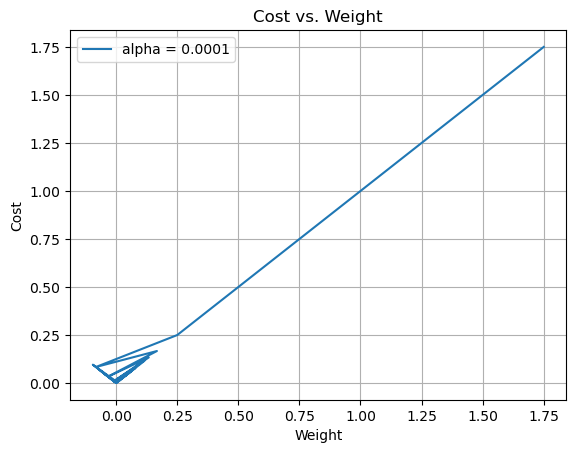

In [20]:
# define function
def g(w):
    return abs(w)

# run gradient descent function
weight_history, cost_history = gradient_descent(g, "diminishing", 20, 1.75)

# plotting
plt.plot(weight_history, cost_history, label=f"alpha = {alpha}")
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.title("Cost vs. Weight")
plt.legend()
plt.grid()
plt.show()

**9) [10 points]**  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach would be better? Write your justification?

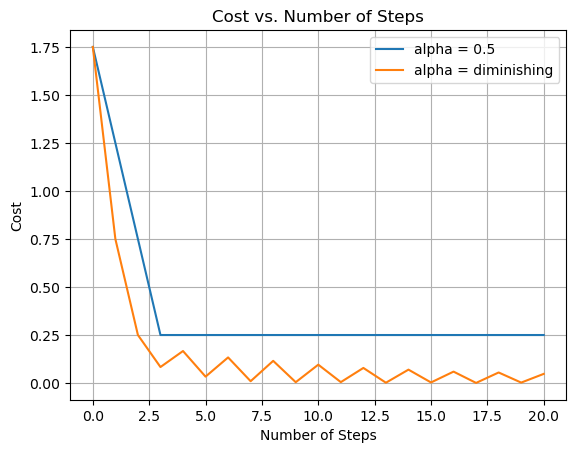

In [21]:
weight_history1, cost_history1 = gradient_descent(g, 0.5, 20, 1.75)
weight_history2, cost_history2 = gradient_descent(g, "diminishing", 20, 1.75)

plt.plot(range(len(cost_history1)), cost_history1, label="alpha = 0.5")
plt.plot(range(len(cost_history2)), cost_history2, label="alpha = diminishing")

plt.xlabel("Number of Steps")
plt.ylabel("Cost")
plt.title("Cost vs. Number of Steps")
plt.legend()
plt.grid()
plt.show()

**We will now look at the oscilating behavior of gradient descent.**

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

**10) [5 points]** Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [22]:
# gradient descent function
# inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w0):
    gradient = grad(g)   # use the autograd library to find the gradient of a function
    
    w = w0
    weight_history = [w]
    cost_history  = [g(w)]

    for k in range(max_its):
        grad_w = gradient(w) # compute gradient

        if alpha=="diminishing":
            w = w - (1/(k+1)) * grad_w
        else:
            w = w - alpha * grad_w

        cost = g(w) # compute cost
        
        # Store history
        weight_history.append(w)
        cost_history.append(cost)
        
    return weight_history,cost_history

**11) [10 points]** Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

#### first run: alpha = 0.01
cost decreases slightly as step number increases

#### second run: alpha = 0.1
cost decreases significantly at first as step number increases, and then plateaus

#### third run: alpha = 1
This alpha leads to an oscillating behavior.

In [23]:
from autograd.numpy import sin

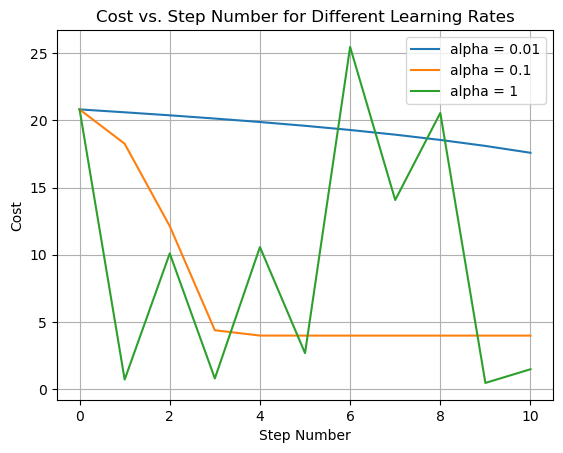

In [24]:
# define cost function
def g(w):
    w0, w1 = w  # Unpack parameters
    return w0**2 + w1**2 + 2*sin(1.5 * (w0 + w1)) + 2

# run gradient descent function for different values of alpha
weight_history1, cost_history1 = gradient_descent(g, 0.01, 10, np.array([3.0, 3.0]))
weight_history2, cost_history2 = gradient_descent(g, 0.1, 10, np.array([3.0, 3.0]))
weight_history3, cost_history3 = gradient_descent(g, 1, 10, np.array([3.0, 3.0]))

# plotting
plt.plot(range(len(cost_history1)), cost_history1, label="alpha = 0.01")
plt.plot(range(len(cost_history2)), cost_history2, label="alpha = 0.1")
plt.plot(range(len(cost_history3)), cost_history3, label="alpha = 1")

# add labels
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost vs. Step Number for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()

**12) [15 points]** This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (***using your intuition; Hint: you should try with alpha values smaller than 0.1***). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

When alpha has a value of 0.15, the cost function seems to converge the fastest (see the blue line in the graph below). 

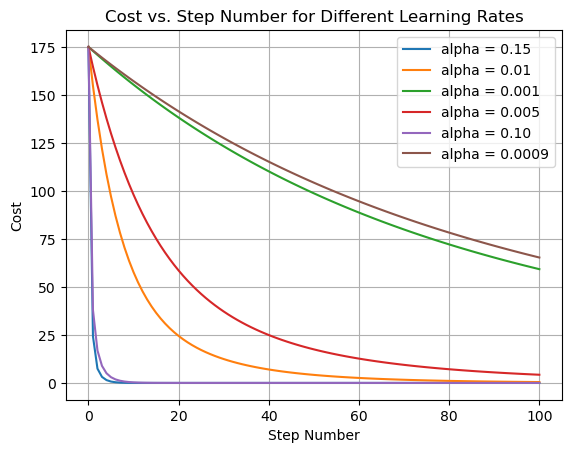

In [25]:
# define cost function
def g(w):
    w0, w1, w2 = w  # Unpack parameters
    return 2*w0**2 + w1**2 + 4*w2**2

weight_history1, cost_history1 = gradient_descent(g, 0.15, 100, np.array([5.0, 5.0, 5.0]))
weight_history2, cost_history2 = gradient_descent(g, 0.01, 100, np.array([5.0, 5.0, 5.0]))
weight_history3, cost_history3 = gradient_descent(g, 0.001, 100, np.array([5.0, 5.0, 5.0]))
weight_history4, cost_history4 = gradient_descent(g, 0.005, 100, np.array([5.0, 5.0, 5.0]))
weight_history5, cost_history5 = gradient_descent(g, 0.10, 100, np.array([5.0, 5.0, 5.0]))
weight_history6, cost_history6 = gradient_descent(g, 0.0009, 100, np.array([5.0, 5.0, 5.0]))

# plotting
plt.plot(range(len(cost_history1)), cost_history1, label="alpha = 0.15")
plt.plot(range(len(cost_history2)), cost_history2, label="alpha = 0.01")
plt.plot(range(len(cost_history3)), cost_history3, label="alpha = 0.001")
plt.plot(range(len(cost_history4)), cost_history4, label="alpha = 0.005")
plt.plot(range(len(cost_history5)), cost_history5, label="alpha = 0.10")
plt.plot(range(len(cost_history6)), cost_history6, label="alpha = 0.0009")

# add labels
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost vs. Step Number for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()